Group C: Fidelis Mnyanyi, Lucas Holstein, Michael Wagdy, Ricardo Santos, Siddhi Dhavale, Tomas Susedik

Last revision: 04/10/2020

---

## Importing the database: csgo_round_snapshots.csv

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('csgo_round_snapshots.csv')

In [3]:
df.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


---

<h1><center>  <font color='blue'> Data cleaning, part 1 </font </center></h1>

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

## Categorical variables

In [5]:
obj_df = df.select_dtypes(include=['object','bool']).copy()
obj_df.head()

,map,bomb_planted,round_winner
0,de_dust2,False,CT
1,de_dust2,False,CT
2,de_dust2,False,CT
3,de_dust2,False,CT
4,de_dust2,False,CT


## Convert <i>round_winner</i> to binary

In [6]:
label_encoder = LabelEncoder()
df['round_winner']= label_encoder.fit_transform(df['round_winner'])
df['round_winner'].head

<bound method NDFrame.head of 0         0
1         0
2         0
3         0
4         0
         ..
122405    1
122406    1
122407    1
122408    1
122409    1
Name: round_winner, Length: 122410, dtype: int32>

## Convert <i>bomb_planted</i> to binary

In [7]:
df['bomb_planted']= label_encoder.fit_transform(df['bomb_planted'])
df['bomb_planted'].head

<bound method NDFrame.head of 0         0
1         0
2         0
3         0
4         0
         ..
122405    1
122406    0
122407    0
122408    0
122409    0
Name: bomb_planted, Length: 122410, dtype: int64>

## Convert <i>map</i> to binary

In [8]:
enc = OneHotEncoder()
enc_df = pd.DataFrame(enc.fit_transform(df[['map']]).toarray())
df = df.join(enc_df)
df = df.drop(['map'], axis = 1)
df.rename(columns={0:'map0', 1:'map1', 2:'map2', 3:'map3', 4:'map4', 5:'map5', 6:'map6', 7:'map7'},
          inplace=True)
df.tail()

,time_left,ct_score,t_score,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,...,t_grenade_decoygrenade,round_winner,map0,map1,map2,map3,map4,map5,map6,map7
122405,15.41,11.0,14.0,1,200.0,242.0,195.0,359.0,100.0,5950.0,...,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
122406,174.93,11.0,15.0,0,500.0,500.0,95.0,175.0,11500.0,23900.0,...,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
122407,114.93,11.0,15.0,0,500.0,500.0,495.0,475.0,1200.0,6700.0,...,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
122408,94.93,11.0,15.0,0,500.0,500.0,495.0,475.0,1200.0,6700.0,...,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
122409,74.93,11.0,15.0,0,375.0,479.0,395.0,466.0,1100.0,7000.0,...,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Check categorical variables

In [9]:
obj_df = df.select_dtypes(include=['object','bool']).copy()
obj_df.head()

""
0
1
2
3
4


---

<h1><center>  <font color='blue'> Exploratory data analysis </font </center></h1>

In [10]:
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline 

## Shape

In [11]:
df.shape

(122410, 104)

## Classes of data

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Columns: 104 entries, time_left to map7
dtypes: float64(102), int32(1), int64(1)
memory usage: 96.7 MB


In [13]:
df.describe()

,time_left,ct_score,t_score,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,...,t_grenade_decoygrenade,round_winner,map0,map1,map2,map3,map4,map5,map6,map7
count,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,...,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000
mean,97.886922,6.709239,6.780435,0.111788,412.106568,402.714500,314.142121,298.444670,9789.023773,11241.036680,...,0.025750,0.509811,0.001185,0.180900,0.194518,0.151752,0.155420,0.115031,0.110212,0.090981
std,54.465238,4.790362,4.823543,0.315107,132.293290,139.919033,171.029736,174.576545,11215.042286,12162.806759,...,0.164162,0.499906,0.034397,0.384937,0.395831,0.358782,0.362306,0.319061,0.313155,0.287583
min,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.920000,3.000000,3.000000,0.000000,350.000000,322.000000,194.000000,174.000000,1300.000000,1550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,94.910000,6.000000,6.000000,0.000000,500.000000,500.000000,377.000000,334.000000,5500.000000,7150.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,166.917500,10.000000,10.000000,0.000000,500.000000,500.000000,486.000000,468.000000,14600.000000,18000.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,175.000000,32.000000,33.000000,1.000000,500.000000,600.000000,500.000000,500.000000,80000.000000,80000.000000,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Missing values

In [14]:
100*df.isnull().sum()/df.isnull().count()

time_left       0.0
ct_score        0.0
t_score         0.0
bomb_planted    0.0
ct_health       0.0
               ... 
map3            0.0
map4            0.0
map5            0.0
map6            0.0
map7            0.0
Length: 104, dtype: float64

## Distribution of data

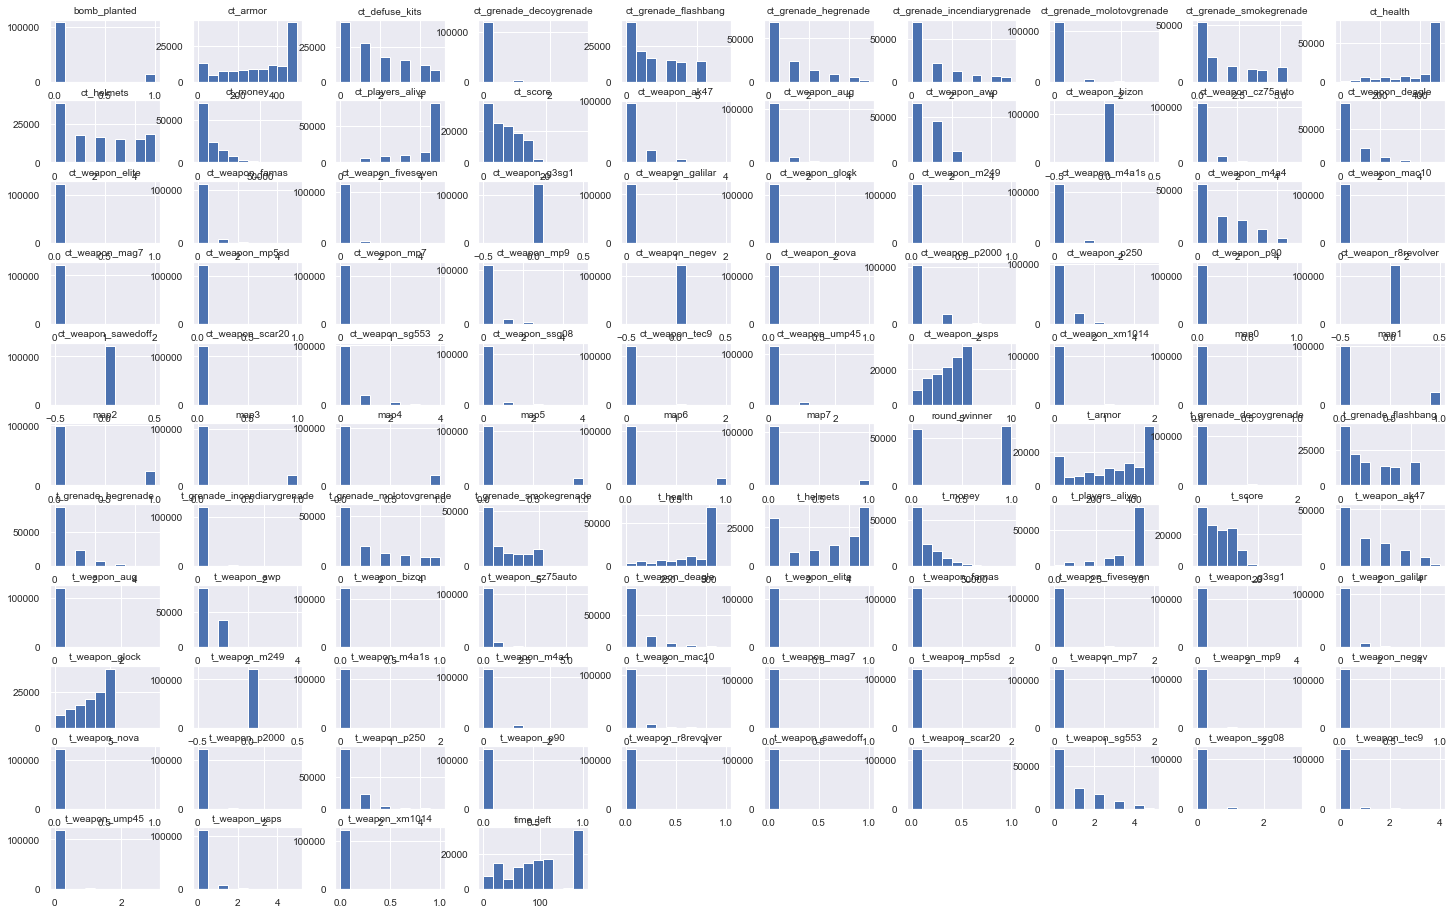

In [15]:
import matplotlib.pylab as plt
attribute_columns = list(df.columns)
if True:
    fontsize = 10
    fig = df[attribute_columns].hist(bins = 10, figsize = (25, 16),
                                       xlabelsize=fontsize,
                                       ylabelsize=fontsize)
    for x in fig.ravel():
        x.title.set_size(fontsize)
else:
    nrows = (len(attribute_columns)+1) // 2
    plt.figure(figsize=(12,25))
    for i in range(len(attribute_columns)):
        name = attribute_columns[i]
        plt.subplot(nrows,2,i+1)
        data[name].hist()
        plt.title(name, fontsize=14)
    
plt.show()

## Rows with duplicate data

In [16]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (4962, 104)


## Columns with constant values

In [17]:
fixed_values = df.columns[df.nunique() == 1]
fixed_values = fixed_values.tolist()
fixed_values

['ct_weapon_bizon',
 'ct_weapon_g3sg1',
 't_weapon_m249',
 'ct_weapon_negev',
 'ct_weapon_r8revolver',
 'ct_weapon_sawedoff']

## Correlation

In [18]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop


def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df, 3))

Top Absolute Correlations
ct_health  ct_players_alive    0.971630
t_health   t_players_alive     0.955859
t_armor    t_helmets           0.877626
dtype: float64


---

<h1><center>  <font color='blue'> Data cleaning, part 2 </font </center></h1>

In [19]:
df.shape

(122410, 104)

## Remove columns with constant values

In [20]:
df.drop(fixed_values, axis = 1, inplace = True)
df.shape

(122410, 98)

## Drop highy correlated columns

In [21]:
df.drop(['ct_players_alive', 't_players_alive', 't_helmets'], axis = 1, inplace = True) 
df.shape

(122410, 95)

## Remove rows with duplicate data

In [22]:
df = df.drop_duplicates(keep=False)
df.shape

(115506, 95)

Remove rows with duplicate data

## Separate validation set

In [23]:
from sklearn.model_selection import train_test_split

data = df

target = 'round_winner'
features = [column for column in data.columns if column != target]

X, X_val, y, y_val = train_test_split(
    data[features],
    data[target],
    test_size = 0.3,
    random_state = 1,
    stratify = data[target])

print(X.shape)
print(X_val.shape)
print(y.shape)
print(y_val.shape)

(80854, 94)
(34652, 94)
(80854,)
(34652,)


In [24]:
#df = X
#df_val = X_val
#print(df.shape)
#print(df_val.shape)

In [25]:
#df_y = y
#df_val_y = y_val
#print(df_y.shape)
#print(df_val_y.shape)

## Remove rows with duplicate data

In [26]:
#df = df.drop_duplicates(keep=False)
#df.shape

---

<h1><center>  <font color='blue'> Modeling </font></center></h1> 

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
import sklearn.feature_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import pickle
from sklearn.model_selection import KFold
from numpy import sort
from numpy import sort
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot
import warnings
warnings.filterwarnings('ignore')

### Split the Dataset into Features & Predictable

In [28]:
#Scale features
names = X.columns
scaler = preprocessing.StandardScaler()
scaled_features = scaler.fit_transform(X)
scaled_features = pd.DataFrame(scaled_features, columns=names)

In [29]:
scaled_features

,time_left,ct_score,t_score,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,...,ct_grenade_decoygrenade,t_grenade_decoygrenade,map0,map1,map2,map3,map4,map5,map6,map7
0,-1.522878,1.703832,-0.383852,2.731658,-0.997320,-1.279807,-0.134276,0.455194,-0.843096,-0.805823,...,-0.164133,-0.154347,-0.034836,-0.46994,2.028724,-0.423743,-0.424271,-0.359113,-0.353470,-0.318980
1,-1.490061,-1.411533,-1.210584,-0.366078,-1.704113,-2.391526,-0.828023,-1.183969,-0.763559,-0.895169,...,-0.164133,-0.154347,-0.034836,-0.46994,-0.492921,-0.423743,-0.424271,-0.359113,2.829096,-0.318980
2,0.029933,0.249995,1.062930,-0.366078,-0.052449,0.021890,0.289028,0.547217,0.049487,-0.777394,...,-0.164133,-0.154347,-0.034836,-0.46994,-0.492921,2.359920,-0.424271,-0.359113,-0.353470,-0.318980
3,-1.487974,-0.373078,1.682979,-0.366078,-0.796442,-2.088970,-0.110759,-1.172466,-0.798908,-0.822067,...,-0.164133,-0.154347,-0.034836,-0.46994,2.028724,-0.423743,-0.424271,-0.359113,-0.353470,-0.318980
4,0.409126,0.665377,1.476296,-0.366078,0.691543,0.725510,0.477162,0.978576,-0.865189,0.798344,...,-0.164133,-0.154347,-0.034836,-0.46994,-0.492921,-0.423743,2.356984,-0.359113,-0.353470,-0.318980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80849,-0.729779,-0.580769,-0.383852,-0.366078,-0.498845,-2.236730,0.430129,-1.201224,-0.591228,-0.789578,...,-0.164133,-0.154347,-0.034836,-0.46994,-0.492921,-0.423743,-0.424271,2.784640,-0.353470,-0.318980
80850,-1.458383,-1.411533,-1.417267,-0.366078,-1.034519,-2.539286,-0.163672,-1.747611,-0.772396,-0.895169,...,-0.164133,-0.154347,-0.034836,-0.46994,-0.492921,-0.423743,-0.424271,-0.359113,-0.353470,3.134992
80851,-0.349828,0.457686,0.442881,-0.366078,0.535305,-2.088970,0.912224,-1.747611,-0.542622,-0.891107,...,-0.164133,-0.154347,-0.034836,-0.46994,-0.492921,-0.423743,2.356984,-0.359113,-0.353470,-0.318980
80852,1.452427,-1.411533,0.649564,-0.366078,0.691543,0.725510,-0.110759,-0.010674,1.719767,4.814852,...,-0.164133,-0.154347,-0.034836,-0.46994,2.028724,-0.423743,-0.424271,-0.359113,-0.353470,-0.318980


In [30]:
#features_train, features_test, predict_train, predict_test = train_test_split(scaled_features,df_predictable, test_size = 0.30, random_state = 42)

In [31]:
seed = 7
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(scaled_features, y, test_size=test_size, random_state=seed)

### Logistic Regression

In [32]:
logreg = LogisticRegression(random_state = 42)

In [33]:
model = LogisticRegression(max_iter=10000)

In [34]:
model = logreg.fit(X_train, y_train)

In [35]:
predicted_r = model.predict(X_test)


### Calculate Accuracy

In [36]:
accuracy = accuracy_score(y_test,predicted_r)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 76.05%


Logistic Regression Accuracy =  75.84%

In [37]:
#fit model using KFold
model = LogisticRegression(random_state = 42)
kfold = KFold(n_splits=10)
results = cross_val_score(model, X, y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 74.94% (0.63%)


Accuracy: 73.58% (0.48%)

### Random Forest

In [38]:
rf_class = RandomForestClassifier()
model_rf = rf_class.fit(X_train, y_train)

In [39]:
predicted_rf = model_rf.predict(X_test)

In [40]:
accuracy = accuracy_score(y_test,predicted_rf)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 84.14%


Random Forest Accuracy (before tuning hyperparameters) = 85.52%

Random Forest Accuracy (after hyperparameters tuning):

In [41]:
#fit model using KFold
model = RandomForestClassifier(random_state = 42)
kfold = KFold(n_splits=10)
results = cross_val_score(model, X, y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 86.03% (0.24%)


### XGBoost Classifier

In [42]:
# fit model on training data
model = XGBClassifier(random_state = 42)
model_xgb = model.fit(X_train, y_train)

In [43]:
# make predictions for test data
predictions = model.predict(X_test)

In [44]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 80.32%


Accuracy (before hyperparameters tuning): 80.08%

Accuracy (after hyperparameters tuning): 86.38% 

In [45]:
#fit model using KFold
model = XGBClassifier(random_state = 42)
kfold = KFold(n_splits=10)
results = cross_val_score(model, X, y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 80.46% (0.44%)


Accuracy (before hyperparameters tuning):80.40% (0.45%)

Accuracy (after hyperparameters tuning): 88.49% (0.34%)

### Feature Selection

In [46]:
#Feature selection 

model = XGBClassifier(nthread=-1, random_state = 42)
model.fit(X_train, y_train)
# make predictions for test data and evaluate
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# Fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
	# select features using threshold
	selection = SelectFromModel(model, threshold=thresh, prefit=True)
	select_X_train = selection.transform(X_train)
	# train model
	selection_model = XGBClassifier(nthread=-1, max_depth= 11, n_estimators= 650, random_state = 42)
	selection_model.fit(select_X_train, y_train)
	# eval model
	select_X_test = selection.transform(X_test)
	predictions = selection_model.predict(select_X_test)
	accuracy = accuracy_score(y_test, predictions)
	print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Accuracy: 80.32%
Thresh=0.000, n=94, Accuracy: 86.66%
Thresh=0.000, n=94, Accuracy: 86.66%
Thresh=0.000, n=94, Accuracy: 86.66%
Thresh=0.000, n=94, Accuracy: 86.66%
Thresh=0.000, n=94, Accuracy: 86.66%
Thresh=0.000, n=94, Accuracy: 86.66%
Thresh=0.000, n=94, Accuracy: 86.66%
Thresh=0.000, n=94, Accuracy: 86.66%
Thresh=0.000, n=94, Accuracy: 86.66%
Thresh=0.001, n=85, Accuracy: 86.62%
Thresh=0.002, n=84, Accuracy: 86.52%
Thresh=0.002, n=83, Accuracy: 86.47%
Thresh=0.003, n=82, Accuracy: 86.68%
Thresh=0.004, n=81, Accuracy: 86.52%
Thresh=0.004, n=80, Accuracy: 86.29%
Thresh=0.005, n=79, Accuracy: 86.64%
Thresh=0.005, n=78, Accuracy: 86.73%
Thresh=0.005, n=77, Accuracy: 86.69%
Thresh=0.006, n=76, Accuracy: 86.42%
Thresh=0.006, n=75, Accuracy: 86.59%
Thresh=0.006, n=74, Accuracy: 86.63%
Thresh=0.006, n=73, Accuracy: 86.49%
Thresh=0.006, n=72, Accuracy: 86.61%
Thresh=0.006, n=71, Accuracy: 86.50%
Thresh=0.006, n=70, Accuracy: 86.50%
Thresh=0.006, n=69, Accuracy: 86.69%
Thresh=0.006, n=68, A

Thresh=0.000, n=87, Accuracy: 86.42%


<h1><center>  <font color='blue'> Data Modeling - Classification Model with PCA </font></center></h1> 


---

### Feature Selection with PCA

In [47]:
scaled_features

,time_left,ct_score,t_score,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,...,ct_grenade_decoygrenade,t_grenade_decoygrenade,map0,map1,map2,map3,map4,map5,map6,map7
0,-1.522878,1.703832,-0.383852,2.731658,-0.997320,-1.279807,-0.134276,0.455194,-0.843096,-0.805823,...,-0.164133,-0.154347,-0.034836,-0.46994,2.028724,-0.423743,-0.424271,-0.359113,-0.353470,-0.318980
1,-1.490061,-1.411533,-1.210584,-0.366078,-1.704113,-2.391526,-0.828023,-1.183969,-0.763559,-0.895169,...,-0.164133,-0.154347,-0.034836,-0.46994,-0.492921,-0.423743,-0.424271,-0.359113,2.829096,-0.318980
2,0.029933,0.249995,1.062930,-0.366078,-0.052449,0.021890,0.289028,0.547217,0.049487,-0.777394,...,-0.164133,-0.154347,-0.034836,-0.46994,-0.492921,2.359920,-0.424271,-0.359113,-0.353470,-0.318980
3,-1.487974,-0.373078,1.682979,-0.366078,-0.796442,-2.088970,-0.110759,-1.172466,-0.798908,-0.822067,...,-0.164133,-0.154347,-0.034836,-0.46994,2.028724,-0.423743,-0.424271,-0.359113,-0.353470,-0.318980
4,0.409126,0.665377,1.476296,-0.366078,0.691543,0.725510,0.477162,0.978576,-0.865189,0.798344,...,-0.164133,-0.154347,-0.034836,-0.46994,-0.492921,-0.423743,2.356984,-0.359113,-0.353470,-0.318980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80849,-0.729779,-0.580769,-0.383852,-0.366078,-0.498845,-2.236730,0.430129,-1.201224,-0.591228,-0.789578,...,-0.164133,-0.154347,-0.034836,-0.46994,-0.492921,-0.423743,-0.424271,2.784640,-0.353470,-0.318980
80850,-1.458383,-1.411533,-1.417267,-0.366078,-1.034519,-2.539286,-0.163672,-1.747611,-0.772396,-0.895169,...,-0.164133,-0.154347,-0.034836,-0.46994,-0.492921,-0.423743,-0.424271,-0.359113,-0.353470,3.134992
80851,-0.349828,0.457686,0.442881,-0.366078,0.535305,-2.088970,0.912224,-1.747611,-0.542622,-0.891107,...,-0.164133,-0.154347,-0.034836,-0.46994,-0.492921,-0.423743,2.356984,-0.359113,-0.353470,-0.318980
80852,1.452427,-1.411533,0.649564,-0.366078,0.691543,0.725510,-0.110759,-0.010674,1.719767,4.814852,...,-0.164133,-0.154347,-0.034836,-0.46994,2.028724,-0.423743,-0.424271,-0.359113,-0.353470,-0.318980


In [48]:
# Split data between ct_, t_ and other features
team = scaled_features[[col for col in scaled_features.columns if 'ct_' and 't_' in col]]
team.columns

team_ct = scaled_features[[col for col in scaled_features.columns if 'ct_' in col]]
team_ct.columns

team_t = team[[col for col in team.columns if 'ct_' not in col]]
team_t.columns


others = scaled_features[[col for col in scaled_features.columns if 'ct_' and 't_' not in col]]
others.columns



Index(['time_left', 'bomb_planted', 'map0', 'map1', 'map2', 'map3', 'map4',
       'map5', 'map6', 'map7'],
      dtype='object')

##PCA for CT and T

In [49]:
from sklearn.decomposition import PCA

pca_ct = PCA(n_components=2)

pca_t = PCA(n_components=2)

principalComponents = pca_ct.fit_transform(team_ct)

principal_ct = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

principalComponents = pca_t.fit_transform(team_t)

principal_t = pd.DataFrame(data = principalComponents
             , columns = ['principal component 3', 'principal component 4'])

In [50]:
df_pca = pd.concat([others, principal_ct, principal_t], axis = 1)
df_pca

,time_left,bomb_planted,map0,map1,map2,map3,map4,map5,map6,map7,principal component 1,principal component 2,principal component 3,principal component 4
0,-1.522878,2.731658,-0.034836,-0.46994,2.028724,-0.423743,-0.424271,-0.359113,-0.353470,-0.318980,-0.910170,1.207910,-1.382651,-0.014271
1,-1.490061,-0.366078,-0.034836,-0.46994,-0.492921,-0.423743,-0.424271,-0.359113,2.829096,-0.318980,-3.246451,-0.166328,-2.708574,1.432175
2,0.029933,-0.366078,-0.034836,-0.46994,-0.492921,2.359920,-0.424271,-0.359113,-0.353470,-0.318980,1.406510,0.957502,0.283032,-0.604206
3,-1.487974,-0.366078,-0.034836,-0.46994,2.028724,-0.423743,-0.424271,-0.359113,-0.353470,-0.318980,-2.081147,-0.903938,-2.617179,-0.098213
4,0.409126,-0.366078,-0.034836,-0.46994,-0.492921,-0.423743,2.356984,-0.359113,-0.353470,-0.318980,1.201399,-2.001127,3.416072,-0.743083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80849,-0.729779,-0.366078,-0.034836,-0.46994,-0.492921,-0.423743,-0.424271,2.784640,-0.353470,-0.318980,0.456861,0.109508,-2.831077,0.323749
80850,-1.458383,-0.366078,-0.034836,-0.46994,-0.492921,-0.423743,-0.424271,-0.359113,-0.353470,3.134992,-3.003154,-0.672835,-3.623053,0.470928
80851,-0.349828,-0.366078,-0.034836,-0.46994,-0.492921,-0.423743,2.356984,-0.359113,-0.353470,-0.318980,1.589925,-0.750521,-3.375966,0.082729
80852,1.452427,-0.366078,-0.034836,-0.46994,2.028724,-0.423743,-0.424271,-0.359113,-0.353470,-0.318980,-2.264920,1.602945,0.180606,-1.279415


### Split the Dataset

In [51]:
features_train, features_test, predict_train, predict_test = train_test_split(df_pca,y, test_size = 0.30, random_state = 1)

In [52]:
select = sklearn.feature_selection.SelectKBest(k=7)
selected_features = select.fit(features_train, predict_train)
indices_selected = selected_features.get_support(indices=True)
colnames_selected = [features_train.columns[i] for i in indices_selected]

### Logistic Regression with PCA

In [53]:
logreg = LogisticRegression(random_state=42)

In [54]:
model = LogisticRegression(max_iter=10000)

In [55]:
model = logreg.fit(features_train, predict_train)

### Round Winner Prediction

In [56]:
predicted = model.predict(features_test)



```
# This is formatted as code
```

### Calculate Accuracy

In [57]:
accuracy = accuracy_score(predict_test,predicted)
print("Accuracy = ", accuracy)

Accuracy =  0.7263470338459002


*Logistic Accuracy* =  0.7263882590592406


### Random Forest with PCA

In [58]:
rf_class = RandomForestClassifier(random_state=42)
model_rf = rf_class.fit(features_train[colnames_selected], predict_train)

In [59]:
predicted_rf = model_rf.predict(features_test[colnames_selected])

**Calculate Accuracy**

In [60]:
accuracy = accuracy_score(predict_test,predicted_rf)
print("Random Forest Accuracy = ", accuracy)

Random Forest Accuracy =  0.743455497382199


Random Forest Accuracy = 0.7455

### XGBoost with PCA

In [61]:
xg_class = XGBClassifier(random_state=42)
model_xg = xg_class.fit(features_train[colnames_selected], predict_train)

In [62]:
predicted_xg = model_xg.predict(features_test[colnames_selected])

**Calculate Accuracy**

In [63]:
accuracy = accuracy_score(predict_test,predicted_rf)
print("Accuracy = ", accuracy)

Accuracy =  0.743455497382199


XGBoost Accuracy = 0.74559

# **Random Forest with Hyperperemeter tuning**

### RD Tuning for max_depth

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  3.6min finished


Best: 0.860712 using {'max_depth': 35}
0.840045 (0.003157) with: {'max_depth': 20}
0.858832 (0.003173) with: {'max_depth': 30}
0.860712 (0.001753) with: {'max_depth': 35}
0.859821 (0.002045) with: {'max_depth': 40}


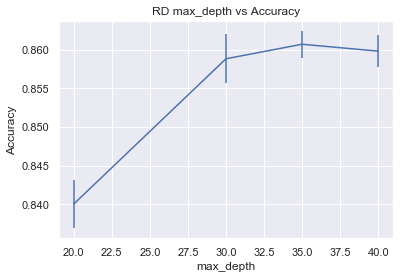

In [64]:
import numpy 
# grid search
model  = RandomForestClassifier()
max_depth = [20,30,35,40]
param_grid = dict(max_depth=max_depth)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="accuracy", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot
pyplot.errorbar(max_depth, means, yerr=stds)
pyplot.title("RD max_depth vs Accuracy")
pyplot.xlabel('max_depth')
pyplot.ylabel('Accuracy')
pyplot.savefig('RD_max_depth.png')

0.857937 (0.003434) with: {'max_depth': 30}

### Random Forest Tuning for n_estimators

Best: 0.865164 using {'n_estimators': 800}
0.863866 (0.002746) with: {'n_estimators': 600}
0.863977 (0.002957) with: {'n_estimators': 700}
0.865164 (0.003099) with: {'n_estimators': 800}
0.864348 (0.003432) with: {'n_estimators': 900}
0.865164 (0.003903) with: {'n_estimators': 1000}
0.865065 (0.002905) with: {'n_estimators': 1100}
0.865041 (0.003340) with: {'n_estimators': 1200}


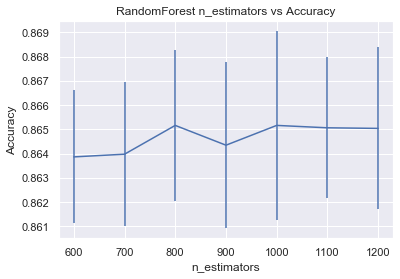

In [65]:

# grid search
model  = RandomForestClassifier()
n_estimators = range(600, 1300, 100)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="accuracy", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot
pyplot.errorbar(n_estimators, means, yerr=stds)
pyplot.title("RandomForest n_estimators vs Accuracy")
pyplot.xlabel('n_estimators')
pyplot.ylabel('Accuracy')
pyplot.savefig('XG_n_estimators.png')

### Random Forest Tuning for n_estimators vs max_depth

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed: 23.9min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed: 139.9min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed: 155.8min finished


Best: 0.865461 using {'max_depth': 40, 'n_estimators': 700}
0.857917 (0.003965) with: {'max_depth': 25, 'n_estimators': 600}
0.856742 (0.002981) with: {'max_depth': 25, 'n_estimators': 700}
0.857546 (0.003157) with: {'max_depth': 25, 'n_estimators': 800}
0.858300 (0.002680) with: {'max_depth': 25, 'n_estimators': 900}
0.857657 (0.002892) with: {'max_depth': 25, 'n_estimators': 1000}
0.862938 (0.003253) with: {'max_depth': 30, 'n_estimators': 600}
0.862814 (0.003596) with: {'max_depth': 30, 'n_estimators': 700}
0.862864 (0.002631) with: {'max_depth': 30, 'n_estimators': 800}
0.863284 (0.003105) with: {'max_depth': 30, 'n_estimators': 900}
0.863371 (0.003055) with: {'max_depth': 30, 'n_estimators': 1000}
0.864175 (0.002890) with: {'max_depth': 35, 'n_estimators': 600}
0.864360 (0.003066) with: {'max_depth': 35, 'n_estimators': 700}
0.864348 (0.003209) with: {'max_depth': 35, 'n_estimators': 800}
0.864707 (0.003076) with: {'max_depth': 35, 'n_estimators': 900}
0.864286 (0.003225) with: {'

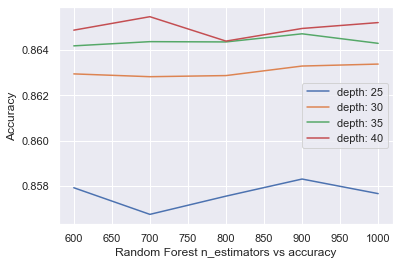

In [66]:
# grid search
model = RandomForestClassifier()
n_estimators = [600,700,800,900,1000]
max_depth = [25,30,35,40]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="accuracy", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot results
scores = numpy.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    pyplot.plot(n_estimators, scores[i], label='depth: ' + str(value))
pyplot.legend()
pyplot.xlabel('Random Forest n_estimators vs accuracy')
pyplot.ylabel('Accuracy')
pyplot.savefig('RD_n_estimators_vs_max_depth.png')

### Random Forest for Max Features

['auto', 'sqrt']
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  20 | elapsed:  1.9min remaining:   12.6s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.9min finished


Best: 0.861120 using {'max_features': 'sqrt'}
0.860106 (0.003624) with: {'max_features': 'auto'}
0.861120 (0.002785) with: {'max_features': 'sqrt'}


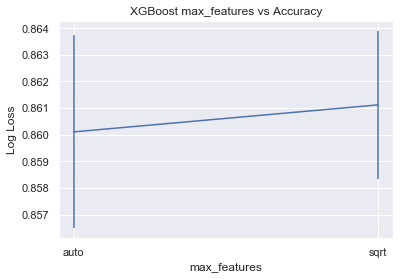

In [67]:

# grid search
model  = RandomForestClassifier()
max_features = ['auto', 'sqrt']
print(max_features)
param_grid = dict(max_features = max_features)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="accuracy", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot
pyplot.errorbar(max_features, means, yerr=stds)
pyplot.title("XGBoost max_features vs Accuracy")
pyplot.xlabel('max_features')
pyplot.ylabel('Log Loss')
pyplot.savefig('XG_max_features.png')

<h1><center>  <font color='blue'> HyperParameter Tuning for GXBOOST </font></center></h1> 

### XB Tune n_estimators (number of trees)

Best: 0.870173 using {'n_estimators': 900}
0.805217 (0.003847) with: {'n_estimators': 100}
0.824560 (0.004359) with: {'n_estimators': 200}
0.838091 (0.003751) with: {'n_estimators': 300}
0.846674 (0.003870) with: {'n_estimators': 400}
0.853019 (0.002878) with: {'n_estimators': 500}
0.858869 (0.002805) with: {'n_estimators': 600}
0.863878 (0.002600) with: {'n_estimators': 700}
0.867131 (0.002722) with: {'n_estimators': 800}
0.870173 (0.002598) with: {'n_estimators': 900}


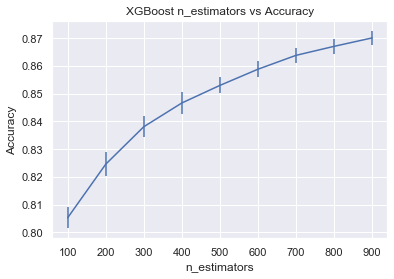

In [68]:
# grid search
model = XGBClassifier()
n_estimators = range(100, 1000, 100)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="accuracy", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot
pyplot.errorbar(n_estimators, means, yerr=stds)
pyplot.title("XGBoost n_estimators vs Accuracy")
pyplot.xlabel('n_estimators')
pyplot.ylabel('Accuracy')
pyplot.savefig('XG_n_estimators.png')

Best: 0.869668 using {'n_estimators': 900}

### XB Tune max_depth (size of trees)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  4.7min finished


Best: 0.859759 using {'max_depth': 11}
0.794073 (0.004934) with: {'max_depth': 5}
0.818648 (0.003741) with: {'max_depth': 7}
0.841579 (0.004051) with: {'max_depth': 9}
0.859759 (0.003475) with: {'max_depth': 11}


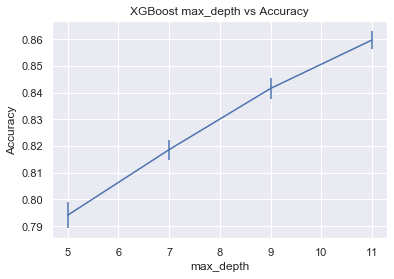

In [69]:
# grid search
model = XGBClassifier()
max_depth = range(5, 13, 2)
param_grid = dict(max_depth=max_depth)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="accuracy", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot
pyplot.errorbar(max_depth, means, yerr=stds)
pyplot.title("XGBoost max_depth vs Accuracy")
pyplot.xlabel('max_depth')
pyplot.ylabel('Accuracy')
pyplot.savefig('max_depth.png')

Best: 0.842308 using {'max_depth': 9}

### XB Tune n_estimators vs max_depth

[8, 10, 11, 12, 14]
Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed: 24.8min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed: 154.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 235.4min finished


Best: 0.886079 using {'max_depth': 12, 'n_estimators': 750}
0.878225 (0.003637) with: {'max_depth': 8, 'n_estimators': 550}
0.879536 (0.002700) with: {'max_depth': 8, 'n_estimators': 600}
0.880983 (0.002949) with: {'max_depth': 8, 'n_estimators': 650}
0.881948 (0.002817) with: {'max_depth': 8, 'n_estimators': 700}
0.882517 (0.002215) with: {'max_depth': 8, 'n_estimators': 750}
0.883370 (0.002729) with: {'max_depth': 10, 'n_estimators': 550}
0.884397 (0.002622) with: {'max_depth': 10, 'n_estimators': 600}
0.884631 (0.002575) with: {'max_depth': 10, 'n_estimators': 650}
0.885176 (0.002471) with: {'max_depth': 10, 'n_estimators': 700}
0.885571 (0.003016) with: {'max_depth': 10, 'n_estimators': 750}
0.884582 (0.002747) with: {'max_depth': 11, 'n_estimators': 550}
0.884928 (0.002918) with: {'max_depth': 11, 'n_estimators': 600}
0.885695 (0.002768) with: {'max_depth': 11, 'n_estimators': 650}
0.885745 (0.002945) with: {'max_depth': 11, 'n_estimators': 700}
0.885720 (0.003373) with: {'max_dep

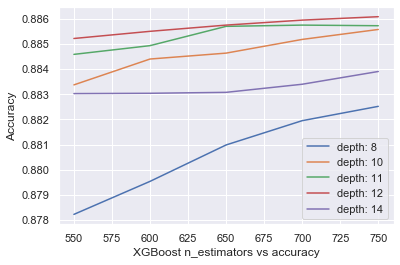

In [70]:
# grid search
model = XGBClassifier()
n_estimators = [550,600,650,700,750]
max_depth = [8,10,11,12,14]
print(max_depth)
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="accuracy", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot results
scores = numpy.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    pyplot.plot(n_estimators, scores[i], label='depth: ' + str(value))
pyplot.legend()
pyplot.xlabel('XGBoost n_estimators vs accuracy')
pyplot.ylabel('Accuracy')
pyplot.savefig('XG_n_estimators_vs_max_depth.png')

Best: 0.882481 using {'max_depth': 10, 'n_estimators': 500}

### Tune learning_rate

Best: 0.814369 using {'learning_rate': 0.5}
0.805217 (0.003847) with: {'learning_rate': 0.3}
0.810040 (0.003737) with: {'learning_rate': 0.4}
0.814369 (0.002854) with: {'learning_rate': 0.5}


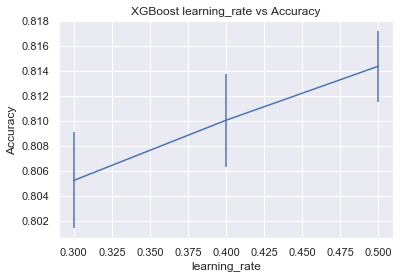

In [71]:
# grid search
model = XGBClassifier()
learning_rate = [0.3,0.4,0.5]
param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="accuracy", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot
pyplot.errorbar(learning_rate, means, yerr=stds)
pyplot.title("XGBoost learning_rate vs Accuracy")
pyplot.xlabel('learning_rate')
pyplot.ylabel('Accuracy')
pyplot.savefig('XG_learning_rate.png')

Best: 0.813620 using {'learning_rate': 0.5}

### Tune learning_date vs n_estimators

Best: 0.868380 using {'learning_rate': 0.5, 'n_estimators': 650}
0.842556 (0.003578) with: {'learning_rate': 0.2, 'n_estimators': 500}
0.846353 (0.003421) with: {'learning_rate': 0.2, 'n_estimators': 550}
0.847490 (0.003979) with: {'learning_rate': 0.2, 'n_estimators': 600}
0.851090 (0.004026) with: {'learning_rate': 0.2, 'n_estimators': 650}
0.853019 (0.002878) with: {'learning_rate': 0.3, 'n_estimators': 500}
0.856272 (0.002943) with: {'learning_rate': 0.3, 'n_estimators': 550}
0.858869 (0.002805) with: {'learning_rate': 0.3, 'n_estimators': 600}
0.861046 (0.002813) with: {'learning_rate': 0.3, 'n_estimators': 650}
0.858226 (0.004279) with: {'learning_rate': 0.4, 'n_estimators': 500}
0.861615 (0.004546) with: {'learning_rate': 0.4, 'n_estimators': 550}
0.863433 (0.004812) with: {'learning_rate': 0.4, 'n_estimators': 600}
0.865189 (0.004584) with: {'learning_rate': 0.4, 'n_estimators': 650}
0.863173 (0.002687) with: {'learning_rate': 0.5, 'n_estimators': 500}
0.864385 (0.002315) with:

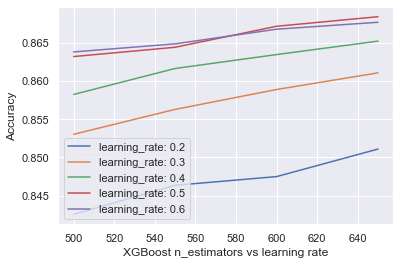

In [72]:
# grid search
model = XGBClassifier()
n_estimators = [500,550,600,650]
learning_rate = [0.2,0.3,0.4,0.5,0.6]
param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="accuracy", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X,y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot results
scores = numpy.array(means).reshape(len(learning_rate), len(n_estimators))
for i, value in enumerate(learning_rate):
    pyplot.plot(n_estimators, scores[i], label='learning_rate: ' + str(value))
pyplot.legend()
pyplot.xlabel('XGBoost n_estimators vs learning rate')
pyplot.ylabel('Accuracy')
pyplot.savefig('XG_n_estimators_vs_learning_rate.png')

Best: 0.866643 using {'learning_rate': 0.5, 'n_estimators': 600}

### XGBoost Tune colsample_bytree (not relevant)

In [73]:
# grid search
""" 
model = XGBClassifier(nthread=-1)
colsample_bytree = [0.7,0.8,0.9,1.0]
param_grid = dict(colsample_bytree=colsample_bytree)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="accuracy", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot
pyplot.errorbar(colsample_bytree, means, yerr=stds)
pyplot.title("XGBoost colsample_bytree vs Log Loss")
pyplot.xlabel('colsample_bytree')
pyplot.ylabel('Log Loss')
pyplot.savefig('colsample_bytree.png')
""" 

' \nmodel = XGBClassifier(nthread=-1)\ncolsample_bytree = [0.7,0.8,0.9,1.0]\nparam_grid = dict(colsample_bytree=colsample_bytree)\nkfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)\ngrid_search = GridSearchCV(model, param_grid, scoring="accuracy", n_jobs=-1, cv=kfold)\ngrid_result = grid_search.fit(X, y)\n# summarize results\nprint("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))\nmeans = grid_result.cv_results_[\'mean_test_score\']\nstds = grid_result.cv_results_[\'std_test_score\']\nparams = grid_result.cv_results_[\'params\']\nfor mean, stdev, param in zip(means, stds, params):\n\tprint("%f (%f) with: %r" % (mean, stdev, param))\n# plot\npyplot.errorbar(colsample_bytree, means, yerr=stds)\npyplot.title("XGBoost colsample_bytree vs Log Loss")\npyplot.xlabel(\'colsample_bytree\')\npyplot.ylabel(\'Log Loss\')\npyplot.savefig(\'colsample_bytree.png\')\n'

Best: 0.805824 using {'colsample_bytree': 1.0}

### XGBoost Tune colsample_bylevel (not relevant)

In [74]:
# grid search
""" model = XGBClassifier(nthread=-1)
colsample_bylevel = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0]
param_grid = dict(colsample_bylevel=colsample_bylevel)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="accuracy", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot
pyplot.errorbar(colsample_bylevel, means, yerr=stds)
pyplot.title("XGBoost colsample_bylevel vs Log Loss")
pyplot.xlabel('colsample_bylevel')
pyplot.ylabel('Log Loss')
pyplot.savefig('colsample_bylevel.png') 

"""

' model = XGBClassifier(nthread=-1)\ncolsample_bylevel = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0]\nparam_grid = dict(colsample_bylevel=colsample_bylevel)\nkfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)\ngrid_search = GridSearchCV(model, param_grid, scoring="accuracy", n_jobs=-1, cv=kfold)\ngrid_result = grid_search.fit(X, y)\n# summarize results\nprint("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))\nmeans = grid_result.cv_results_[\'mean_test_score\']\nstds = grid_result.cv_results_[\'std_test_score\']\nparams = grid_result.cv_results_[\'params\']\nfor mean, stdev, param in zip(means, stds, params):\n\tprint("%f (%f) with: %r" % (mean, stdev, param))\n# plot\npyplot.errorbar(colsample_bylevel, means, yerr=stds)\npyplot.title("XGBoost colsample_bylevel vs Log Loss")\npyplot.xlabel(\'colsample_bylevel\')\npyplot.ylabel(\'Log Loss\')\npyplot.savefig(\'colsample_bylevel.png\') \n\n'

Best: 0.805824 using {'colsample_bylevel': 1.0}

### XGBoost Tune subsample (not relevant)

In [75]:
# grid search
""" model = XGBClassifier()
subsample = [0.6, 0.7, 0.8, 1.0]
param_grid = dict(subsample=subsample)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="accuracy", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot
pyplot.errorbar(subsample, means, yerr=stds)
pyplot.title("XGBoost subsample vs Accuracy")
pyplot.xlabel('subsample')
pyplot.ylabel('Log Loss')
pyplot.savefig('subsample.png')
""" 

' model = XGBClassifier()\nsubsample = [0.6, 0.7, 0.8, 1.0]\nparam_grid = dict(subsample=subsample)\nkfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)\ngrid_search = GridSearchCV(model, param_grid, scoring="accuracy", n_jobs=-1, cv=kfold)\ngrid_result = grid_search.fit(X, y)\n# summarize results\nprint("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))\nmeans = grid_result.cv_results_[\'mean_test_score\']\nstds = grid_result.cv_results_[\'std_test_score\']\nparams = grid_result.cv_results_[\'params\']\nfor mean, stdev, param in zip(means, stds, params):\n\tprint("%f (%f) with: %r" % (mean, stdev, param))\n# plot\npyplot.errorbar(subsample, means, yerr=stds)\npyplot.title("XGBoost subsample vs Accuracy")\npyplot.xlabel(\'subsample\')\npyplot.ylabel(\'Log Loss\')\npyplot.savefig(\'subsample.png\')\n'

Best: 0.806537 using {'subsample': 1.0}

<h1><center>  <font color='blue'> Best model on Validation set </font></center></h1> 

#We chose XGBoost as our best model with a max_depth = 11 and a n_estimators (trees) = 650

In [76]:
# fit model on training data
model = XGBClassifier(nthread=-1, max_depth= 11, n_estimators= 650, random_state = 42)
model_xgb = model.fit(X_train, y_train)

In [77]:
X_train

,time_left,ct_score,t_score,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,...,ct_grenade_decoygrenade,t_grenade_decoygrenade,map0,map1,map2,map3,map4,map5,map6,map7
53900,0.027657,-0.580769,-1.210584,-0.366078,-0.052449,0.021890,0.271390,-0.597321,0.354380,-0.221013,...,-0.164133,-0.154347,-0.034836,-0.469940,-0.492921,-0.423743,2.356984,-0.359113,-0.35347,-0.318980
38244,1.547272,0.665377,0.029514,-0.366078,0.691543,0.725510,-1.321876,-0.148708,0.279261,0.656202,...,-0.164133,-0.154347,-0.034836,2.127933,-0.492921,-0.423743,-0.424271,-0.359113,-0.35347,-0.318980
4634,-1.203058,1.496141,1.682979,-0.366078,-2.284427,-1.582363,-1.286601,-0.125703,-0.542622,-0.887046,...,-0.164133,-0.154347,-0.034836,2.127933,-0.492921,-0.423743,-0.424271,-0.359113,-0.35347,-0.318980
20618,1.546513,0.042304,-0.590535,-0.366078,0.691543,0.725510,-0.851539,-1.747611,2.064427,0.489694,...,-0.164133,-0.154347,-0.034836,-0.469940,-0.492921,-0.423743,2.356984,-0.359113,-0.35347,-0.318980
78159,-1.113335,0.873068,1.062930,2.731658,-1.399076,-2.004535,-0.210705,-0.712350,-0.675184,-0.261624,...,-0.164133,-0.154347,-0.034836,-0.469940,-0.492921,-0.423743,-0.424271,-0.359113,-0.35347,3.134992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53459,1.280567,1.703832,0.856247,-0.366078,0.691543,0.725510,-1.286601,1.128113,0.473685,-0.769272,...,-0.164133,-0.154347,-0.034836,-0.469940,-0.492921,-0.423743,-0.424271,2.784640,-0.35347,-0.318980
10742,-0.842456,0.665377,1.476296,-0.366078,0.691543,0.296302,0.959258,1.001581,0.827184,-0.891107,...,-0.164133,-0.154347,-0.034836,-0.469940,-0.492921,-0.423743,-0.424271,-0.359113,-0.35347,3.134992
49689,-0.350207,-0.788460,-0.797218,-0.366078,0.691543,0.662184,1.018050,1.001581,-0.560297,0.087637,...,-0.164133,-0.154347,-0.034836,-0.469940,-0.492921,2.359920,-0.424271,-0.359113,-0.35347,-0.318980
58564,-0.729590,0.873068,1.269613,-0.366078,-2.738262,-2.370418,-1.339514,-1.195472,-0.781233,-0.245380,...,-0.164133,-0.154347,-0.034836,-0.469940,2.028724,-0.423743,-0.424271,-0.359113,-0.35347,-0.318980


In [78]:
#Scale Val features
names = X_val.columns
scaler = preprocessing.StandardScaler()
scaled_features_val = scaler.fit_transform(X_val)
scaled_features_val = pd.DataFrame(scaled_features_val, columns=names)

In [79]:
# make predictions for val data
predictions = model_xgb.predict(scaled_features_val)
prediction = pd.DataFrame(predictions, columns=['predictions']).to_csv('prediction.csv')

In [80]:
# evaluate predictions
accuracy = accuracy_score(y_val, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 86.00%


Best Accuracy: 86.00%